In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams["figure.figsize"] = 20,5

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('temp.csv')

In [3]:
#columns modified, "Daily minimum temp" = " Daily minimum temperatures in Melbourne, 1981-1990"
df.head()

,Date,Daily minimum temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [4]:
df.describe()

,Date,Daily minimum temp
count,3650,3650
unique,3650,230
top,01-01-1981,11
freq,1,51


In [5]:
df = df.rename(columns={'Daily minimum temp' : 'Temp'})
df.head()

,Date,Temp
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [7]:
temperature_values = df['Temp'].unique()
temperature_values

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20',
       '16.2', '13.3', '16.7', '21.5', '25', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15', '13.7', '13.9', '18.3', '22', '22.1', '21.2', '18.4',
       '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6', '17',
       '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3', '10.6',
       '11.7', '14.2', '11.2', '8.1', '8', '8.8', '13.4', '10.9', '11',
       '14.5', '18.1', '10', '14.9', '15.9', '13', '7.6', '11.5', '13.5',
       '12.4', '13.2', '13.8', '9', '9.8', '8.9', '7.4', '9.9', '9.3',
       '8.6', '11.9', '14', '12', '10.5', '10.7', '10.1', '5.3', '6.6',
       '8.5', '5.9', '3.2', '2.1', '3.4', '5.4', '9.6', '12.3', '12.6',
       '12.8', '11.6', '5.7', '7.1', '2.5', '3.5', '4.6', '7.7', '10.4',
       '9.2', '6.1', '2.7', '4.3', '6.3', '3.8', '4.4', '4.8', '5.8',
   

In [8]:
#checking for non convertable data
notdigit = df[~df['Temp'].str[0].str.isdigit()]
notdigit

,Date,Temp
565,20-07-1982,?0.2
566,21-07-1982,?0.8
1290,14-07-1984,?0.1


#### No Null Values, Coloumn renamed, Temp is Object not Float, Starting EDA and Visualization 

In [9]:
#converting Temp to Float
df['Temp'] = df['Temp'].apply(lambda x:x.replace('?',""))
df['Temp'] = df['Temp'].astype(float)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
#checking info, coverted to Float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [12]:
# Graphs Moving Average and Mean: 

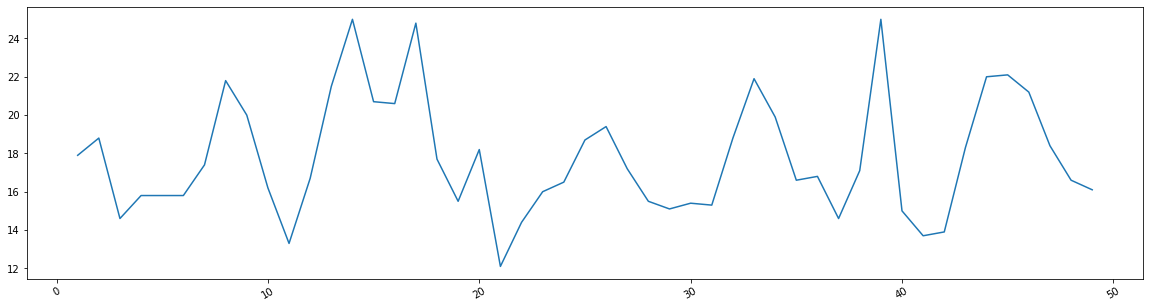

In [13]:
plt.plot(df[1:50]["Temp"])
plt.xticks(rotation=30)
plt.show()

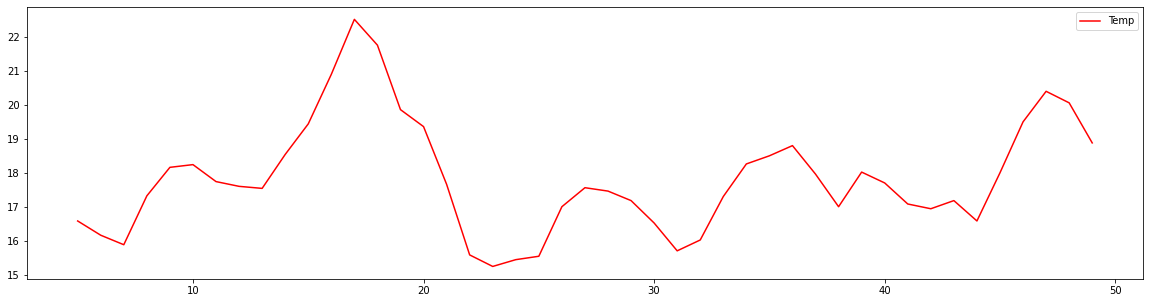

In [14]:
rollingseries = df[1:50].rolling(window=5)
rollingmean = rollingseries.mean() #we can compute any statistical measure
#print(rollingmean.head(10))
rollingmean.plot(color="red")
plt.show()


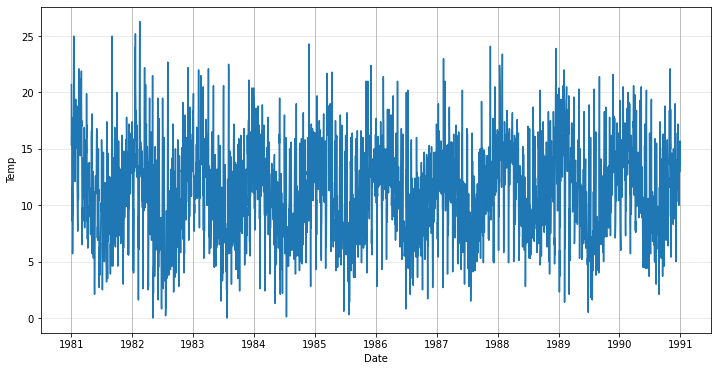

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'], y=df['Temp'])
plt.grid(axis='x')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### Trend:

In [16]:

def get_trend(timeseries, deg=3):
  x = list(range(len(timeseries)))
  y = timeseries.values
  coef = np.polyfit(x, y, deg)
  trend = np.poly1d(coef)(x)
  return pd.Series(data=trend, index = timeseries.index)

df['Trend'] = get_trend(df['Temp'])
df.head()

,Date,Temp,Trend
0,1981-01-01,20.7,12.591767
1,1981-02-01,17.9,12.587840
2,1981-03-01,18.8,12.583918
3,1981-04-01,14.6,12.580001
4,1981-05-01,15.8,12.576088


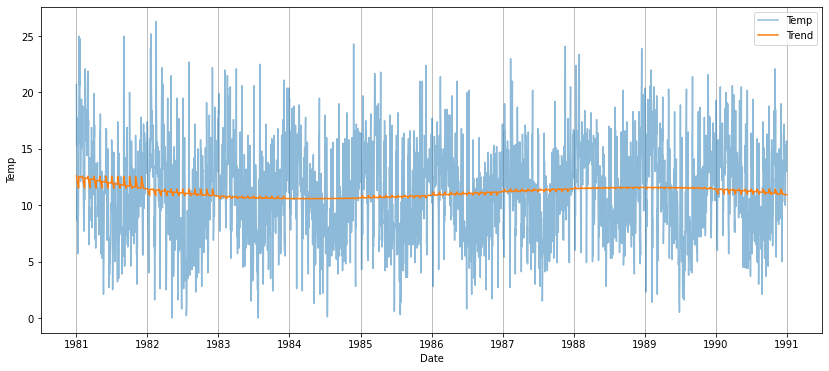

In [17]:
plt.figure(figsize=(14,6))
sns.lineplot(x= df['Date'], y= df['Temp'], alpha=0.5, label='Temp')
sns.lineplot(x=df['Date'], y= df['Trend'], label='Trend')
plt.grid(axis='x')
plt.legend()
plt.show()

In [18]:
df['Temp Last month']=df['Temp'].shift(+1)
df['Temp Last 2 month']=df['Temp'].shift(+2)
df['Temp Last 3 month']=df['Temp'].shift(+3)
df

,Date,Temp,Trend,Temp Last month,Temp Last 2 month,Temp Last 3 month
0,1981-01-01,20.7,12.591767,NaN,NaN,NaN
1,1981-02-01,17.9,12.587840,20.7,NaN,NaN
2,1981-03-01,18.8,12.583918,17.9,20.7,NaN
3,1981-04-01,14.6,12.580001,18.8,17.9,20.7
4,1981-05-01,15.8,12.576088,14.6,18.8,17.9
...,...,...,...,...,...,...
3645,1990-12-27,14.0,10.938017,14.6,12.9,10.0
3646,1990-12-28,13.6,10.936019,14.0,14.6,12.9
3647,1990-12-29,13.5,10.934017,13.6,14.0,14.6
3648,1990-12-30,15.7,10.932012,13.5,13.6,14.0


In [20]:
df=df.dropna()

In [21]:
X=df.drop(columns=['Trend','Temp'])
X

,Date,Temp Last month,Temp Last 2 month,Temp Last 3 month
3,1981-04-01,18.8,17.9,20.7
4,1981-05-01,14.6,18.8,17.9
5,1981-06-01,15.8,14.6,18.8
6,1981-07-01,15.8,15.8,14.6
7,1981-08-01,15.8,15.8,15.8
...,...,...,...,...
3645,1990-12-27,14.6,12.9,10.0
3646,1990-12-28,14.0,14.6,12.9
3647,1990-12-29,13.6,14.0,14.6
3648,1990-12-30,13.5,13.6,14.0


In [27]:
x1,x2,x3 = df['Temp Last month'], df['Temp Last 2 month'], df['Temp Last 3 month']
x1,x2,x3= np.array(x1),np.array(x2),np.array(x3)
x1,x2,x3= x1.reshape(-1,1),x3.reshape(-1,1),x3.reshape(-1,1)
X=np.concatenate((x1,x2,x3),axis=1)
X


array([[18.8, 20.7, 20.7],
       [14.6, 17.9, 17.9],
       [15.8, 18.8, 18.8],
       ...,
       [13.6, 14.6, 14.6],
       [13.5, 14. , 14. ],
       [15.7, 13.6, 13.6]])

In [22]:
y = df['Temp']
y

3       14.6
4       15.8
5       15.8
6       15.8
7       17.4
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3647, dtype: float64

In [26]:
y1=df['Temp']
y1=np.array(y1)
y1

array([14.6, 15.8, 15.8, ..., 13.5, 15.7, 13. ])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.8 , random_state=100)
X_train.shape,y1_train.shape,X_test.shape,y1_test.shape

((2917, 3), (2917,), (730, 3), (730,))

In [29]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [30]:
lr.fit(X_train,y1_train)

LinearRegression()

In [32]:
# print the intercept
print(lr.intercept_)

1.8952247583702704


In [33]:
# print the intercept
print(lr.coef_)

[0.68057448 0.07413056 0.07413056]


In [34]:
coeff_df = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [35]:
# Making predictions using the model
y1_pred = lr.predict(X_test)
print(y1_pred)

[11.52043724 13.14380979 11.9591475   7.69707395 15.27252335 10.56566643
  9.98012175 16.15262374  9.00302502  8.7025697   7.41269793  8.83922445
 10.81628366  7.55756583 11.90055639  5.89256832 12.1613533   6.70247123
 14.66125952 14.02926995  8.37568188  7.61008382  9.83722039 11.88841016
  6.77124202  7.34732037  8.3217372  12.56898464 13.82367092 15.18017345
  3.35479673 12.3385533  15.29270923 11.42880068 16.41932027 10.65122988
  7.05151147 12.50968019  9.5899964   9.68020627 10.13374264 17.06756264
 10.7071411  14.11144017  6.51455169 13.45712469 10.55084032 14.49691909
 22.64094703 16.99557211  9.2691817  11.24481422 15.08925023 16.68351041
 12.9989419  13.35673513  7.88106041 10.74357978 10.25235154  7.53470006
 10.99687689 10.26378442 16.07974638 12.64454189 11.61492717 10.10069719
 12.43018986 17.4812671  13.61413881 11.87769062 11.76980127  6.93826234
  8.31637743  6.55903002  8.47196487  4.83330138 10.1916204  10.71660744
  9.20916391 15.66264869 11.78927381 13.52928871  7

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y1_test, y1_pred)
r_squared = r2_score(y1_test, y1_pred)
r_squared


0.6145325377617645

In [37]:
df1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df1

,Actual,Predicted
0,12.9,11.520437
1,9.8,13.143810
2,13.7,11.959147
3,9.1,7.697074
4,18.5,15.272523
...,...,...
725,9.1,7.662062
726,9.6,8.609506
727,11.2,8.621653
728,11.4,12.041491
